<a href="https://colab.research.google.com/github/imusicmash/stanford_llm_python/blob/main/test_gemini_vision_on_tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
!pip install -q -U google-generativeai
!pip install Pillow
!pip install PyPDF4
!pip install pdfplumber

In [ ]:
import google.generativeai as genai
from google.generativeai import generative_models
import PIL.Image
import pdfplumber
import PyPDF4

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('google_api')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
from google.colab import files
files.upload()

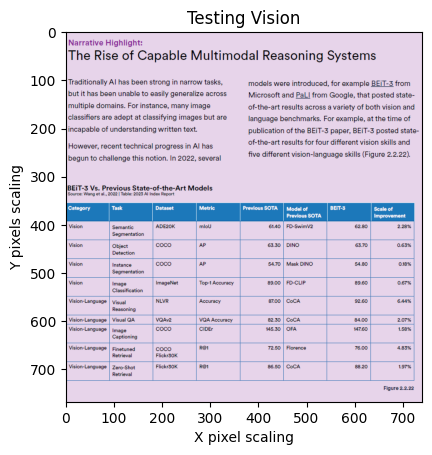

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

plt.title("Testing Vision")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

image = mpimg.imread("HAITable.png")
plt.imshow(image)

In [ ]:
vis_model = genai.GenerativeModel('gemini-pro-vision')
result = vis_model.generate_content(["Capture all the text in this picture one row at a time and format it exactly the way it appears in this picture", PIL.Image.open('HAITable.png')])

In [ ]:
print("this is the text returned by the vision api \n\n", result.text)

this is the text returned by the vision api 

  Narrative Highlight: The Rise of Capable Multimodal Reasoning Systems

Traditionally AI has been strong in narrow tasks, but it has been unable to easily generalize across multiple domains. For instance, many image classifiers are adept at classifying images but are incapable of understanding written text. However, recent technical progress in AI has begun to challenge this notion. In 2022, several models were introduced, for example BEiT-3 from Microsoft and PaLM from Google, that posted state-of-the-art results across a variety of both vision and language benchmarks. For example, at the time of publication of the BEiT-3 paper, BEiT-3 posted state-of-the-art results for four different vision skills and five different vision-language skills (Figure 2.2.2).

BEiT-3 Vs. Previous State-of-the-Art Models
Source: Wang et al., 2022 | Table 2.2.2

Category	Task	Dataset	Metric	Previous SOTA	Model of Previous SOTA	BEiT-3	Scale of Improvement
Visio

In [ ]:
def format_query():
  question = input("Enter your question: ")
  prompt = "Answer this question: " + question + " using the context provided. You should avoid providing incorrect answers if you do not have the context."
  print("\nthis is the prompt that is provided to the LLM\n", prompt)
  return prompt

In [ ]:
def run_query(prompt, context):
  messages = []
  messages.append({'role': 'user', 'parts': [f"{prompt}"]})
  response = model.generate_content(messages)
  print ("\n initial resposnse from LLM without the context\n", response.candidates[0].content.parts[0].text)

  messages.append(response.candidates[0].content)
  messages.append({'role': 'user', 'parts': [f"{context}"]})
  response = model.generate_content(messages)
  print ("\n the resposnse from LLM when context is provided\n", response.candidates[0].content.parts[0].text)

In [ ]:
def read_pdf (file_path, pages):
  with open(file_path, "rb") as pdf_file:
    reader = PyPDF4.PdfFileReader(pdf_file)
    metadata = reader.getDocumentInfo()
    print ("Title: ", metadata.get("/Title", ""))
    print ("Author: ", metadata.get("/Author", ""))

  with pdfplumber.open(file_path) as pdf:
    for page_num, page in enumerate(pdf.pages):
      text = page.extract_text()
      if text.strip():
        pages.append((page_num + 1, text))
  return page_num

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
print("running a query on the table captured as a image by the vision api \n\n")
prompt = format_query()
run_query(prompt, result.text)

running a query on the table captured as a image by the vision api 


Enter your question: what is the scale of improvement for object detection?

this is the prompt that is provided to the LLM
 Answer this question: what is the scale of improvement for object detection? using the context provided. You should avoid providing incorrect answers if you do not have the context.

 initial resposnse from LLM without the context
 The provided context does not mention anything about the scale of improvement for object detection, so I cannot answer this question from the provided context.

 the resposnse from LLM when context is provided
 The scale of improvement for object detection is **0.63%**.

This can be found in the table provided in the context, under the "Vision" category and "Object Detection" task. The previous state-of-the-art (SOTA) model for object detection was DINO, with an AP of 63.30. BEiT-3 improved upon this by achieving an AP of 63.70, which represents a scale of improvemen

The vision api is able to pull the exact information of 0.63% from the table

In [ ]:
doc = []
pages = read_pdf('./HAI_AI-Index-Report_2023.pdf', doc)
#pages = read_pdf('./HAIReport.pdf', doc)
print("Length of the pdf in number of pages: ", len(doc))

Title:  
Author:  
Length of the pdf in number of pages:  386


In [ ]:
print("This is the page that was referenced above with the vision api\n\n", doc[92])

This is the page that was referenced above with the vision api

 (93, 'AArrttiifificciiaall IInntteelllliiggeennccee Chapter 2: Technical Performance\nIInnddeexx RReeppoorrtt 22002233\n2.1 Computer Vision–Image\nNarrative Highlight:\nThe Rise of Capable Multimodal Reasoning Systems\nTraditionally AI has been strong in narrow tasks, models were introduced, for example BEiT-3 from\nbut it has been unable to easily generalize across Microsoft and PaLI from Google, that posted state-\nmultiple domains. For instance, many image of-the-art results across a variety of both vision and\nclassifiers are adept at classifying images but are language benchmarks. For example, at the time of\nincapable of understanding written text. publication of the BEiT-3 paper, BEiT-3 posted state-\nof-the-art results for four different vision skills and\nHowever, recent technical progress in AI has\nfive different vision-language skills (Figure 2.2.22).\nbegun to challenge this notion. In 2022, several\nBEiT-3 V

In [ ]:
print("running a query on the pdf table \n\n")
prompt = format_query()
run_query(prompt, doc[92])

running a query on the pdf table 


Enter your question: what is the scale of improvement for object detection?

this is the prompt that is provided to the LLM
 Answer this question: what is the scale of improvement for object detection? using the context provided. You should avoid providing incorrect answers if you do not have the context.

 initial resposnse from LLM without the context
 I cannot answer this question because the context has not been provided.

 the resposnse from LLM when context is provided
 The scale of improvement for object detection is 555.444% over the previous state-of-the-art models.


The LLM is hallucinating when querying a pdf table by providing a value of 555.444%